<h2>Importamos librerias:</h2>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Cargamos Dataframe:</h2>

In [18]:
df1 = pd.read_csv("CSVs/dataframe spotify 2020-21 (Limpio).csv", index_col = 0)
pd.set_option("display.max_rows",10, "display.max_columns", None)
df1.head()

,Artist,Song Name,Streams,Release Date,Genre,Loudness,Popularity,Danceability,Tempo,Energy,Chord,Duration (ms)
Index,,,,,,,,,,,,
1,MÃ¥neskin,Beggin',48633449,2017-12-08,"['indie rock italiano', 'italian pop']",-4.808,100.0,0.714,134,0.800,B,211560
2,The Kid LAROI,STAY (with Justin Bieber),47248719,2021-07-09,['australian hip hop'],-5.484,99.0,0.591,169,0.764,C#/Db,141806
3,Olivia Rodrigo,good 4 u,40162559,2021-05-21,['pop'],-5.044,99.0,0.563,166,0.664,A,178147
4,Ed Sheeran,Bad Habits,37799456,2021-06-25,"['pop', 'uk pop']",-3.712,98.0,0.808,126,0.897,B,231041
5,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),33948454,2021-07-23,"['lgbtq+ hip hop', 'pop rap']",-7.409,96.0,0.736,149,0.704,D#/Eb,212000


<h2>Hacemos un reset_index dios sabe por qué...</h2>

In [19]:
#Al filtrar el dataFrame con una máscara hay columnas que no tienen índice y da error...
df1.reset_index
df1.head()

,Artist,Song Name,Streams,Release Date,Genre,Loudness,Popularity,Danceability,Tempo,Energy,Chord,Duration (ms)
Index,,,,,,,,,,,,
1,MÃ¥neskin,Beggin',48633449,2017-12-08,"['indie rock italiano', 'italian pop']",-4.808,100.0,0.714,134,0.800,B,211560
2,The Kid LAROI,STAY (with Justin Bieber),47248719,2021-07-09,['australian hip hop'],-5.484,99.0,0.591,169,0.764,C#/Db,141806
3,Olivia Rodrigo,good 4 u,40162559,2021-05-21,['pop'],-5.044,99.0,0.563,166,0.664,A,178147
4,Ed Sheeran,Bad Habits,37799456,2021-06-25,"['pop', 'uk pop']",-3.712,98.0,0.808,126,0.897,B,231041
5,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),33948454,2021-07-23,"['lgbtq+ hip hop', 'pop rap']",-7.409,96.0,0.736,149,0.704,D#/Eb,212000


<h2>Cogemos las columnas que necesitamos:</h2>

In [20]:
data = df1[["Streams","Popularity","Duration (ms)"]]

<h2>Pasamos la columna de "Duration (ms)" de milisegundos a minutos y la renombramos:</h2>

In [21]:
#Renombramos columna:
data = data.rename(columns={'Duration (ms)':'Duration'})

In [22]:
#Convertimos los str() a float():
data['Duration'] = pd.to_numeric(data.Duration, errors='coerce')

In [23]:
#Aplicamos una función lambda que divide todos los valores de la columna entre 60000:
data['Duration'] = data['Duration'].map(lambda c: round((c / 60000),2))

In [24]:
#Comprobamos que se ha realizado bien la conversión:
print(type(data["Duration"].iloc[0]))
data

<class 'numpy.float64'>


,Streams,Popularity,Duration
Index,,,
1,48633449,100.0,3.53
2,47248719,99.0,2.36
3,40162559,99.0,2.97
4,37799456,98.0,3.85
5,33948454,96.0,3.53
...,...,...,...
1552,4630675,79.0,3.49
1553,4623030,66.0,3.03
1554,4620876,81.0,3.62


In [25]:
#Nos deshacemos de los valores nulos y ordenamos el Dataset por la duración:
data = data.dropna()
data.sort_values(by = "Duration", inplace = True)

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [26]:
#Copiamos una fuente chula de por ahí:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

<h2>Creamos una gráfica de la distribución de la duración:</h2>

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


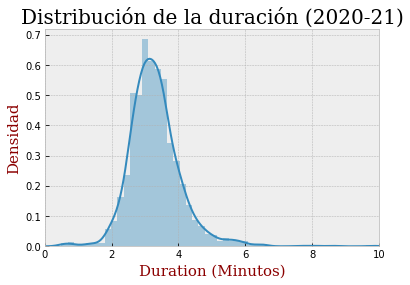

In [27]:
plt.style.use("bmh")
sns.distplot(data["Duration"])
plt.title('Distribución de la duración (2020-21)',fontdict = font1, loc = "center")
plt.xlabel("Duration (Minutos)",fontdict = font2)
plt.ylabel("Densidad",fontdict = font2)
plt.xlim(0,10);

<h2>Creamos un Scatter de Popularidad - Duración:</h2>

Text(0, 0.5, 'Popularity')

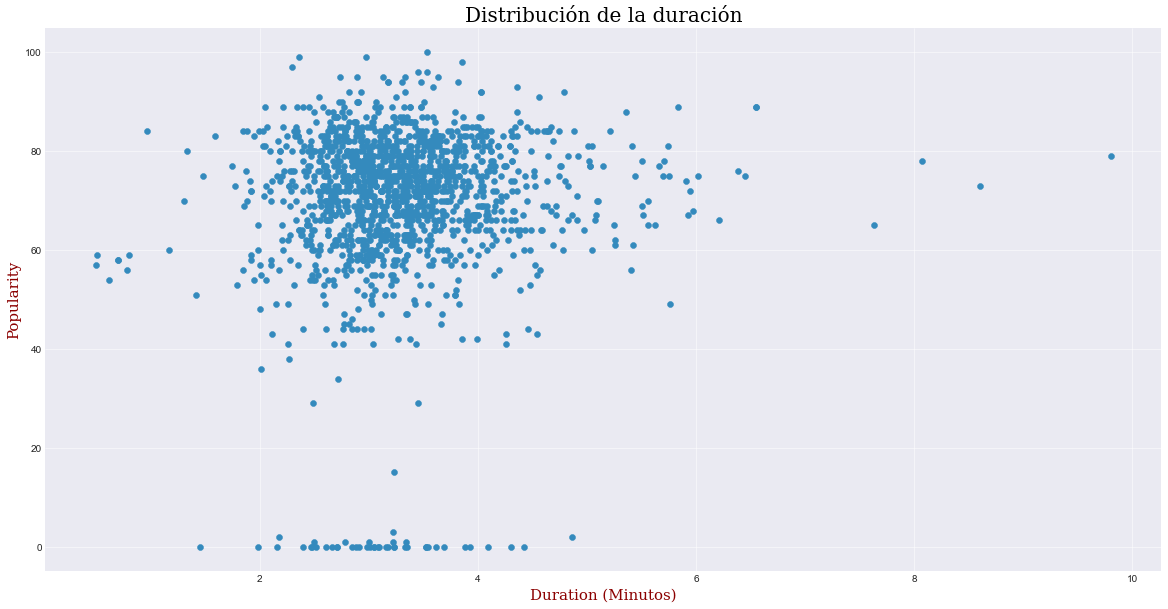

In [32]:
plt.figure(figsize = (20,10))
plt.style.use("seaborn-dark")
plt.scatter(data["Duration"], data["Popularity"])
plt.grid(True, which = "both")
plt.title('Distribución de la duración',fontdict = font1, loc = "center")
plt.xlabel("Duration (Minutos)",fontdict = font2)
plt.ylabel("Popularity",fontdict = font2)

<h2>Ahora creamos la peor gráfica de la historia:</h2>

(5000000.0, 50000000.0)

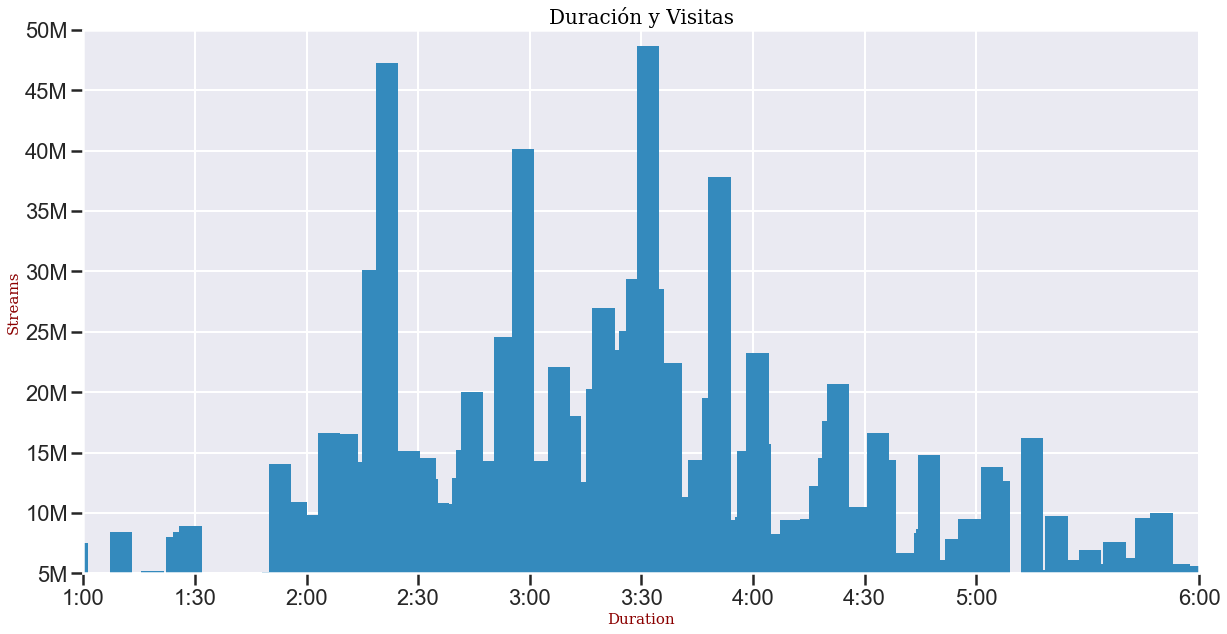

In [33]:
plt.figure(figsize = (20,10))
plt.style.use("seaborn-dark")
sns.set_context("poster")

plt.bar(data["Duration"],data["Streams"],align='center',bottom=True,width = 0.1)
plt.xlabel("Duration", font2)
plt.ylabel("Streams", font2)
plt.grid(True, which = "both")
plt.title("Duración y Visitas",font1)
plt.xticks([0,  0.5,  1,  1.5,  2,  2.5,  3,  3.5,  4,  4.5,  5,  6,  7,  8,  9,  10],
           ["0","0:30","1:00","1:30","2:00","2:30","3:00","3:30","4:00","4:30","5:00","6:00","7:00","8:00","9:00","10:00"])

plt.yticks([0,  0.5e7,  1e7,  1.5e7,  2e7,  2.5e7,  3e7,  3.5e7,  4e7,  4.5e7,  5e7],
          ["0","5M","10M","15M","20M","25M","30M","35M","40M","45M","50M"])
plt.xlim((1,6))
plt.ylim(0.5e7,5e7)


<h2>Sacamos la tendencia de la duración:</h2>

Text(0.5, 1.0, 'Comparación duración media')

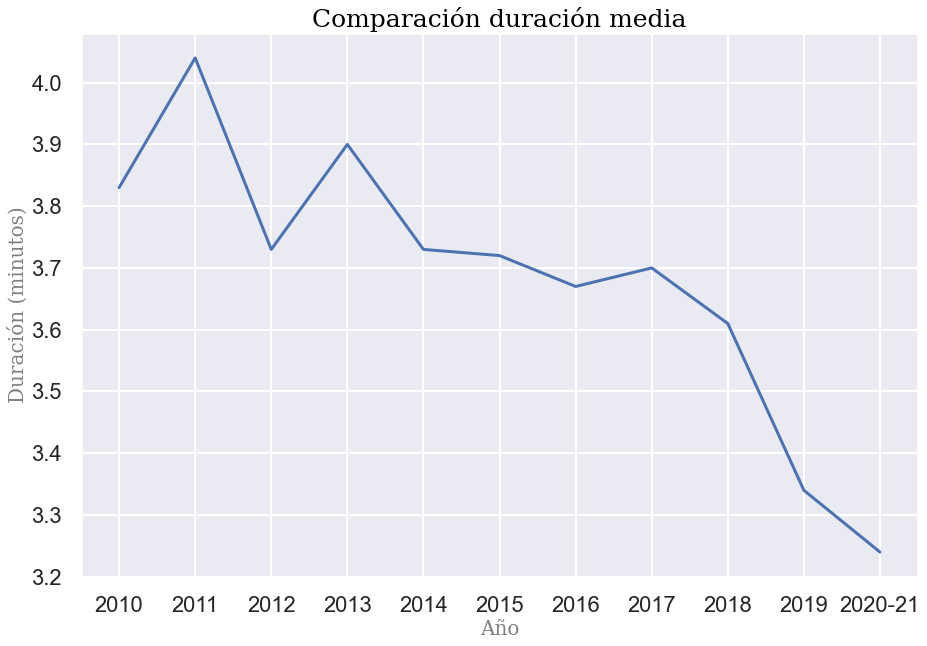

In [34]:
# He sacado a mano la media de duración de las canciones para cada año:
# Super maula...

plt.figure(figsize = (15,10))
sns.set_theme(style="dark")
plt.style.use("seaborn")
sns.set_context("poster")

font1 = {'family':'serif','color':'black','size':25}
font2 = {'family':'serif','color':'grey','size':20}

ax = sns.lineplot(x=["2010","2011","2012","2013","2014",
                    "2015","2016","2017","2018","2019",
                    "2020-21",], y= [3.83 ,4.04,3.73,3.90,3.73,3.72,3.67,3.70,
                                     3.61,3.34,3.24],
                    color = "b")


plt.xlabel("Año", font2)
plt.ylabel("Duración (minutos)", font2)
plt.title("Comparación duración media",font1)